# Análisis de Precios de Casas en California 🏠

## Propósito del Análisis
El mercado inmobiliario en California es conocido por sus precios elevados. En este análisis, queremos explorar un conjunto de datos de casas para descubrir qué factores influyen más en los precios.

### Objetivos:
1. Examinar la distribución de características individuales de las casas.
2. Identificar correlaciones entre variables y su relación con el precio.
3. Visualizar patrones y contar una historia basada en datos.

Al final de este análisis, esperamos responder preguntas como:
- ¿Qué características tienen el mayor impacto en el precio de las casas?
- ¿La proximidad al océano realmente influye en el precio?
- ¿Qué patrones generales se pueden observar en el mercado inmobiliario de California?


## Carga de Datos
# Qué observar aquí:
## Primeras filas:
Revisa cómo se ven los datos. ¿Las columnas tienen nombres claros? Si no, las renombraremos luego.
## Información general (info()):
Verifica el número de valores no nulos (valores faltantes) y el tipo de datos de cada columna.
## Resumen estadístico (describe()):
Mira los valores mínimos, máximos, medias y distribuciones. Esto ayuda a identificar datos anómalos o errores iniciales.

In [ ]:
# Importamos las bibliotecas necesarias
import pandas as pd
import numpy as np

# Cargamos el archivo CSV
from google.colab import files
uploaded = files.upload()  # Esto te permitirá subir el archivo housing.csv

# Convertimos el archivo subido en un DataFrame
housing = pd.read_csv('housing.csv')

# Exploramos los datos
print("Primeras filas del DataFrame:")
print(housing.head())

print("\nInformación general del DataFrame:")
print(housing.info())

print("\nResumen estadístico:")
print(housing.describe())


# Limpieza de Datos
## Manejo de valores faltantes:
Comenzaremos analizando las columnas con valores nulos, y luego llenaremos los datos faltantes con la mediana

In [10]:
# Revisar valores faltantes
valores_faltantes = housing.isnull().sum()
print("Valores faltantes por columna:")
print(valores_faltantes)

# Calcular la mediana de 'total_bedrooms'
mediana_bedrooms = housing['total_bedrooms'].median()
print("Mediana de 'total_bedrooms':", mediana_bedrooms)

# # Rellenar valores faltantes en 'total_bedrooms' con la mediana
# mediana_bedrooms = housing['total_bedrooms'].median()
# housing['total_bedrooms'].fillna(mediana_bedrooms, inplace=True)




Valores faltantes por columna:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
Mediana de 'total_bedrooms': 435.0


# Corrección de tipos de datos
Revisamos si los tipos de datos son correctos o necesitan ajustes.

In [11]:
# Verificar tipos de datos
print("Tipos de datos iniciales:")
print(housing.dtypes)

# Convertir 'ocean_proximity' a categoría
housing['ocean_proximity'] = housing['ocean_proximity'].astype('category')

# Verificar tipos de datos después de la conversión
print("Tipos de datos después de la conversión:")
print(housing.dtypes)


Tipos de datos iniciales:
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object
Tipos de datos después de la conversión:
longitude              float64
latitude               float64
housing_median_age     float64
total_rooms            float64
total_bedrooms         float64
population             float64
households             float64
median_income          float64
median_house_value     float64
ocean_proximity       category
dtype: object


 #Identificación y eliminación de duplicados
Buscamos registros duplicados y los eliminamos si existen.

In [12]:
# Identificar duplicados
duplicados = housing.duplicated().sum()
print(f"Duplicados encontrados: {duplicados}")

# Eliminar duplicados si existen
housing = housing.drop_duplicates()

# Verificar nuevamente
duplicados_tras_eliminar = housing.duplicated().sum()
print(f"Duplicados tras limpieza: {duplicados_tras_eliminar}")


Duplicados encontrados: 0
Duplicados tras limpieza: 0


 # Análisis Exploratorio de Datos (EDA)
## Distribución de características individuales
Para entender cómo están distribuidas las características de las casas, podemos visualizar algunas de las columnas clave, como el valor de la casa, el tamaño de la casa, la edad de la casa, etc.

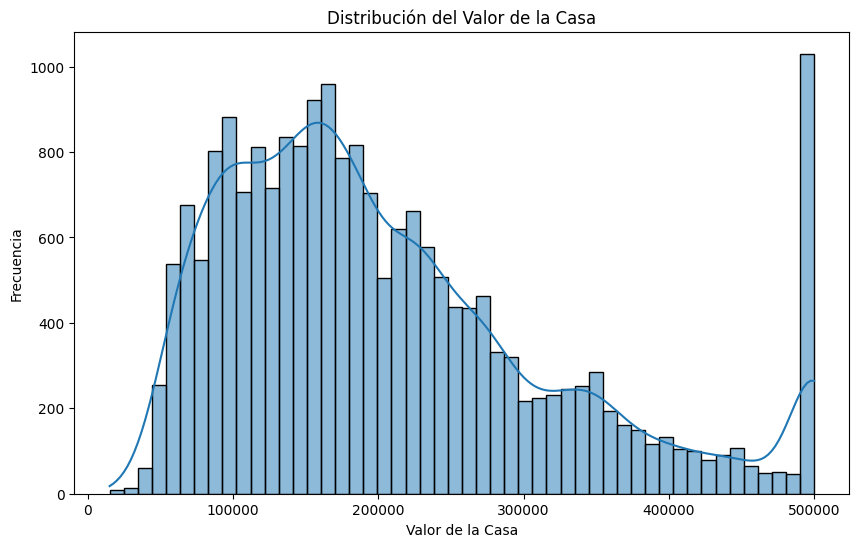

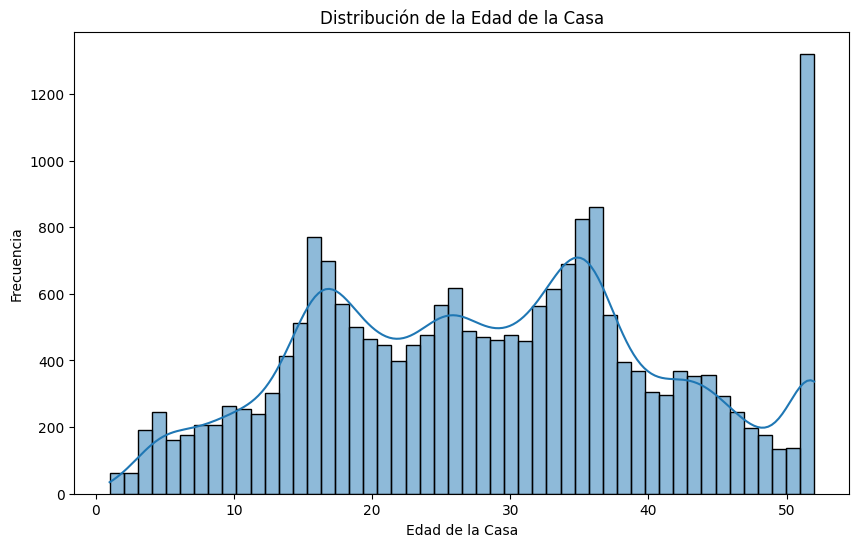

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución del valor de la casa
plt.figure(figsize=(10,6))
sns.histplot(housing['median_house_value'], kde=True, bins=50)
plt.title('Distribución del Valor de la Casa')
plt.xlabel('Valor de la Casa')
plt.ylabel('Frecuencia')
plt.show()

# Distribución de la edad de la casa
plt.figure(figsize=(10,6))
sns.histplot(housing['housing_median_age'], kde=True, bins=50)
plt.title('Distribución de la Edad de la Casa')
plt.xlabel('Edad de la Casa')
plt.ylabel('Frecuencia')
plt.show()


## Análisis de correlaciones entre variables
Examinemos cómo se correlacionan las variables entre sí, especialmente entre el valor de la casa y otras características.

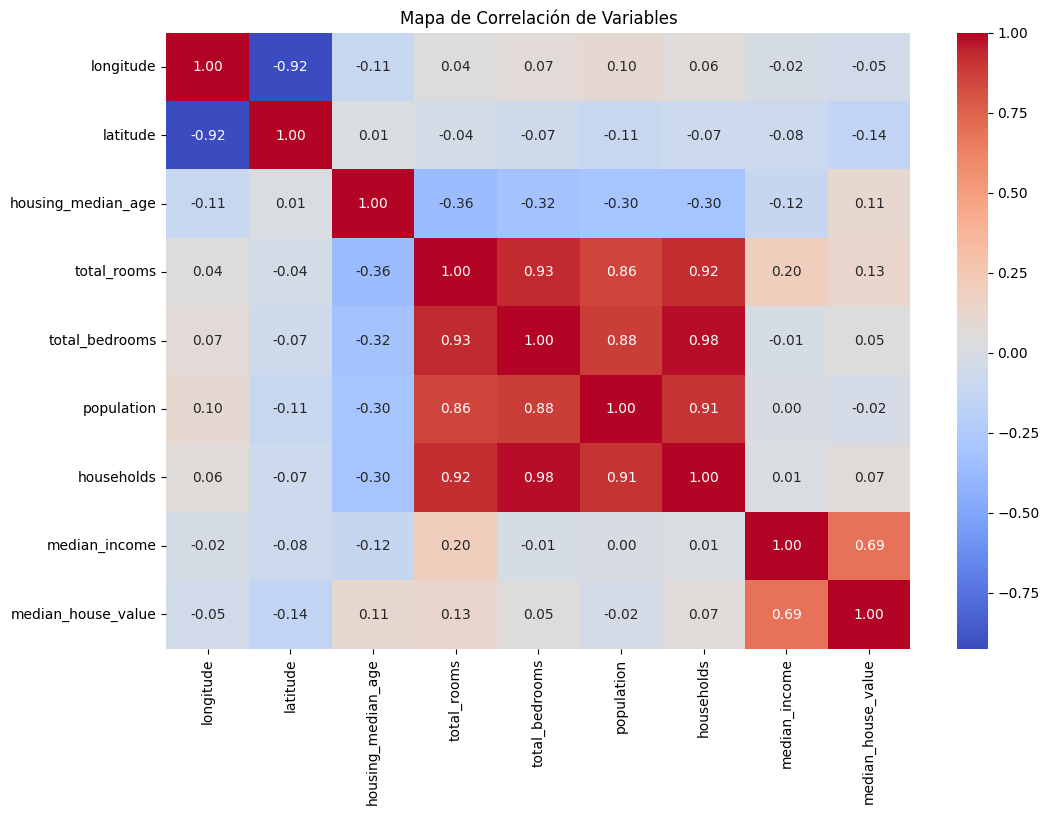

In [15]:
# Excluir las columnas no numéricas
housing_numeric = housing.select_dtypes(include=['float64', 'int64'])

# Mapa de calor de correlación
plt.figure(figsize=(12,8))
sns.heatmap(housing_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Correlación de Variables')
plt.show()



# Segmentación y filtrado de datos
Podemos segmentar los datos según ciertas categorías, como la proximidad al océano, para observar cómo cambian los precios de las casas.

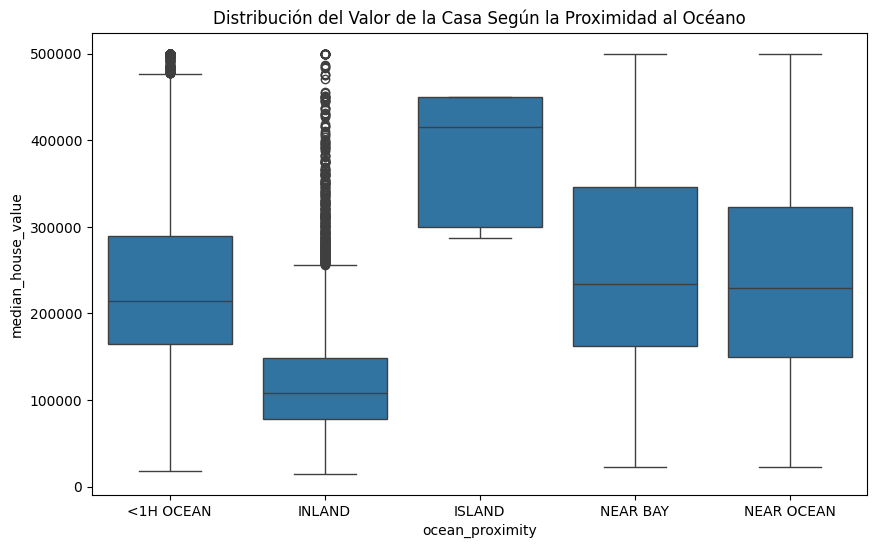

In [18]:
# Precios de casas según la proximidad al océano
plt.figure(figsize=(10,6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=housing)
plt.title('Distribución del Valor de la Casa Según la Proximidad al Océano')
plt.show()


 # Conclusiones
El análisis muestra que el precio de las casas está fuertemente influenciado por el ingreso mediano, la proximidad al océano y el tamaño de la vivienda (número de habitaciones). Las casas cercanas al océano y en áreas con ingresos más altos tienden a tener precios más elevados. La edad de la casa también parece tener un impacto moderado en el precio.